تمرین سری هشتم

این تمرین با کمک لینک زیر آماده شده است


https://medium.com/@sangramsing/k-means-clustering-for-imagery-analysis-881ced89053d

برای مثال های بیشتر به وب سایت زیر مراجعه کنید:


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

همجنین می توانید برای دید بهتر از عملکرد خوشه بند به لینک زیر نگاهی بیندازید

http://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/



در این تمرین می خواهیم مجموعه دادگانی که شامل دست خط ۱۰ عدد یک رقمی است را  خوشه بندی کنیم. برای اینکار لازم است دیتا ها را کاهش بعد دهیم. همچنین پس از خوشه بندی می خواهیم با کمک لیبل داده ها دقت خوشه بند را محاسبه کنیم

In [0]:
import sys
import sklearn
import matplotlib
import numpy as np
from sklearn.decomposition import PCA

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [3]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


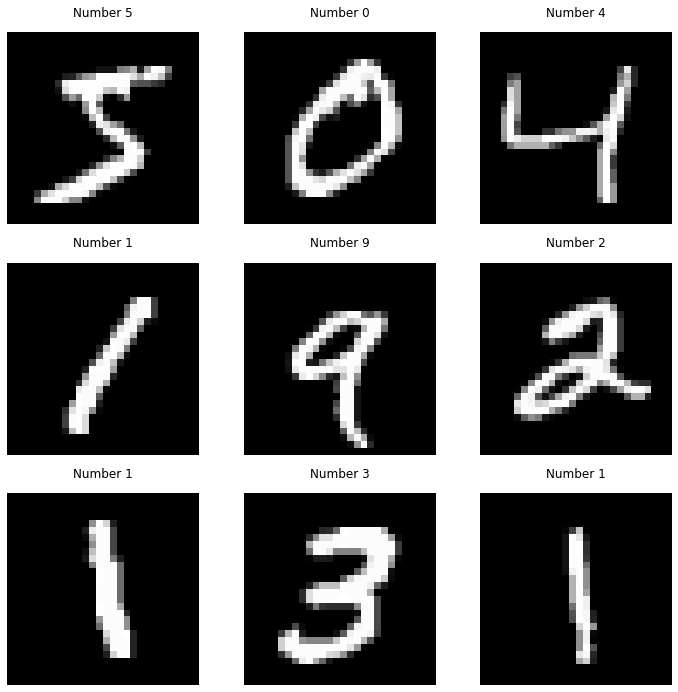

In [5]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

# dimensionality reduction

Reduse dimention with pca

In [6]:
# in this section reduce the features of each image
# you can use any feature selection you prefer. we recommend PCA with 2 or 3  features
x = x_train.reshape(x_train.shape[0], 28*28)
test = x_test.reshape(x_test.shape[0], 28*28)

# normalize the data to 0 - 1
x = x.astype(float) / 255.
test = test.astype(float) / 255.
print(np.shape(x))

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(np.array(x))
reduced_test = pca.transform(np.array(test))


(60000, 784)


In [6]:
print(np.shape(reduced_data))

(60000, 2)


Plotting train data with reduced features

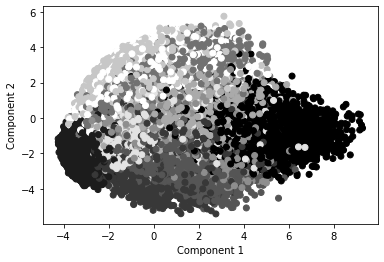

In [0]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    reduced_data[:,0],
    reduced_data[:,1],
    c=y_train  
)

# k means clustering

In [0]:
# in this section write your k means clustering function
# DONT use present functions. write it yourself

k = 10

# initialize centers randomly
centers = reduced_data[np.random.choice(np.arange(len(reduced_data)), k), :]

classes = np.zeros(reduced_data.shape[0], dtype=np.float64)
distances = np.zeros([reduced_data.shape[0], k], dtype=np.float64)

for i in range(50):

  for i, c in enumerate(centers):
    distances[:, i] = np.linalg.norm(reduced_data - c, axis=1)
        
  classes = np.argmin(distances, axis=1)
    
  # update centers 
  for c in range(k):
      
    centers[c] = np.mean(reduced_data[classes == c], 0)


In [8]:
print(np.shape(classes))


(60000,)


plot training data after clustering

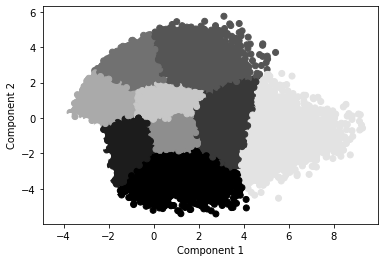

In [23]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    reduced_data[:,0],
    reduced_data[:,1],
    c=classes
)

Cluster Test

plot test set with reduced features

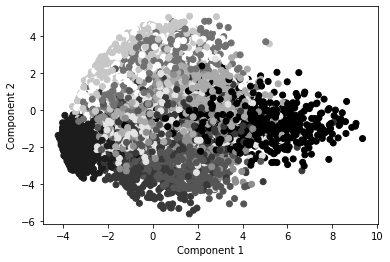

In [42]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    reduced_test[:,0],
    reduced_test[:,1],
    c=y_test  
)

In [0]:
test_classes = np.zeros(reduced_test.shape[0], dtype=np.float64)
test_distances = np.zeros([reduced_test.shape[0], k], dtype=np.float64)

# assign test data to nearest center from training
for i, c in enumerate(centers):
  test_distances[:, i] = np.linalg.norm(reduced_test - c, axis=1)
        
test_classes = np.argmin(test_distances, axis=1)
  

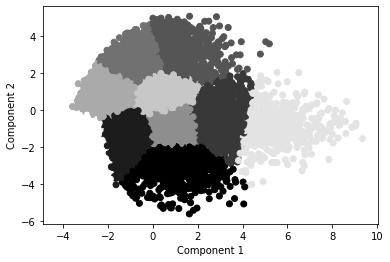

In [25]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    reduced_test[:,0],
    reduced_test[:,1],
    c=test_classes
)

# clustering evaluation

In [45]:
# for evaluate your clustering assign a label for each cluster then calculate your accuracy

def infer_cluster_labels(clusters, actual_labels):

  inferred_labels = {}

  for i in range(0,10):

    labels = []
    index = np.where(clusters == i)

    labels.append(actual_labels[index])

    if len(labels[0]) == 1:
      counts = np.bincount(labels[0])
    else:
      counts = np.bincount(np.squeeze(labels))
    if np.argmax(counts) in inferred_labels:
      inferred_labels[np.argmax(counts)].append(i)
    else:
      inferred_labels[np.argmax(counts)] = [i]
 
  cluster_labels = inferred_labels  

  predicted_labels = np.zeros(len(clusters)).astype(np.uint8)
    
  for i, cluster in enumerate(clusters):
    for key, value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i] = key
                
  return predicted_labels

predicted_labels = infer_cluster_labels(test_classes, y_test)
print (predicted_labels[:20])
print (y_test[:20])

[7 3 1 0 4 1 7 7 6 7 0 5 7 0 1 5 4 7 5 7]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [46]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predicted_labels))

0.4228


# initiation 

نقاط شروع را عوض کنید. این بار ۱۰ نقطه که لیبل آن ها را میدانید و از ده کلاس مختلف هستند را به عنوان نقاط شروع انتخاب کنید




In [58]:
new_centers = []
for i in range(0,10):

  index = reduced_data[y_train == i]
  new_centers.append(index[0])
print(len(new_centers))
print(new_centers)

10
[array([ 3.96750244, -1.1562801 ]), array([-3.13384181, -2.38117507]), array([0.72340404, 0.86799484]), array([ 2.01313435, -1.21873533]), array([-0.20328368,  1.53789248]), array([ 0.48603554, -1.22619108]), array([0.9409477 , 0.59109211]), array([-0.53732868,  3.4220953 ]), array([-1.51669896, -0.9901794 ]), array([-1.50105089,  2.86492226])]


In [0]:
clas = np.zeros(reduced_data.shape[0], dtype=np.float64)
dist = np.zeros([reduced_data.shape[0], k], dtype=np.float64)

for i in range(50):

  for i, c in enumerate(new_centers):
    dist[:, i] = np.linalg.norm(reduced_data - c, axis=1)
  
  clas = np.argmin(dist, axis=1)
    
  for c in range(k):
    new_centers[c] = np.mean(reduced_data[clas == c], 0)

In [0]:
test_classes2 = np.zeros(reduced_test.shape[0], dtype=np.float64)
test_distances = np.zeros([reduced_test.shape[0], k], dtype=np.float64)

# assign test data to nearest center from training
for i, c in enumerate(new_centers):
  test_distances[:, i] = np.linalg.norm(reduced_test - c, axis=1)
        
test_classes2 = np.argmin(test_distances, axis=1)

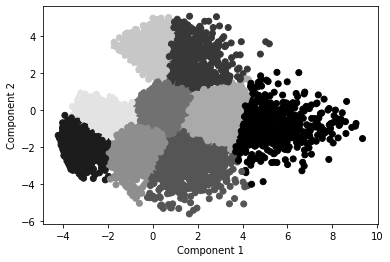

In [61]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    reduced_test[:,0],
    reduced_test[:,1],
    c=test_classes2
)

In [62]:
predicted_labels = infer_cluster_labels(test_classes2, y_test)

print(accuracy_score(y_test, predicted_labels))

0.4096


# امتیازی

چگونه می توان نقاط ابتدایی برای الگوریتم های کلاسترینگ را به صورت هوشمندانه تری انتخاب کرد به طوری که بهترین دقت خوشه بندی را به دست بدهد. عملکرد راه های  پیشنهادی خود را با مثال عددی نشان دهید

In [0]:
new_centers = []
for i in range(0,10):

  index = reduced_data[y_train == i]
  new_centers.append(np.mean(index))

clas = np.zeros(reduced_data.shape[0], dtype=np.float64)
dist = np.zeros([reduced_data.shape[0], k], dtype=np.float64)

for i in range(50):

    for i, c in enumerate(new_centers):
        dist[:, i] = np.linalg.norm(reduced_data - c, axis=1)

    clas = np.argmin(dist, axis=1)

    for c in range(k):
        new_centers[c] = np.mean(reduced_data[clas == c], 0)

test_classes3 = np.zeros(reduced_test.shape[0], dtype=np.float64)
test_distances = np.zeros([reduced_test.shape[0], k], dtype=np.float64)

for i, c in enumerate(new_centers):
  test_distances[:, i] = np.linalg.norm(reduced_test - c, axis=1)
        
test_classes3 = np.argmin(test_distances, axis=1)

In [64]:
predicted_labels = infer_cluster_labels(test_classes3, y_test)


print(accuracy_score(y_test, predicted_labels))

0.4101


در قطعه کد زیر یک نمونه از خوشه بندی سلسله مراتبی را میبینید. سعی کنید با مطالعه الگوریتم خوشه بندی سلسله مراتبی تابعی بنویسید که داده های موجود را مانند مثال دسته بندی کند


مثال از آدرس زیر اقتباس شده است

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


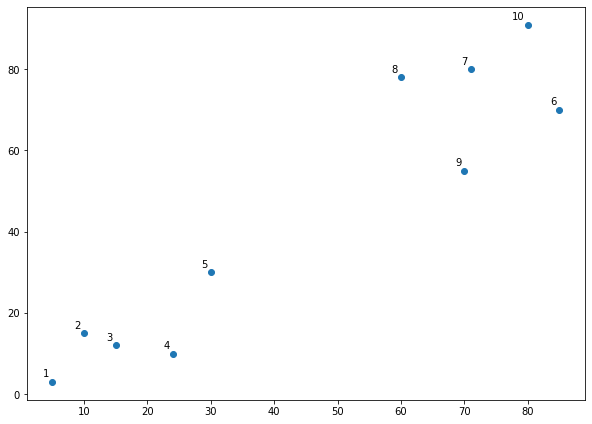

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

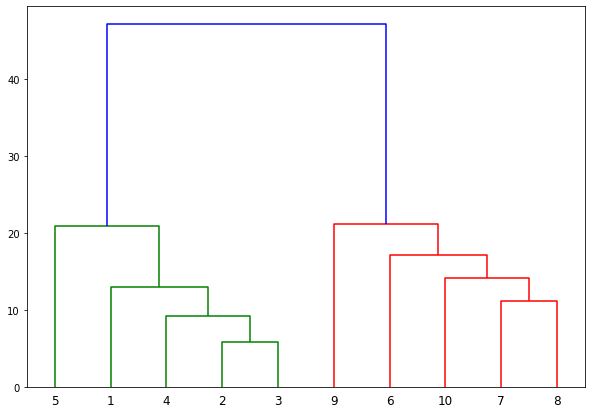

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [0]:
# write your code here 
# you need a function which implements hierarchical clustering